A Survey on Technology Choice
======


In [30]:
# This assignment is to make a model to predict the priority variable 
# PG5_11NSG is my assigned value 

library(dplyr)
# For nicer printing
options(digits=2);

In [31]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

[1] "Time to take entire survey:  680.35652173913  Seconds"
[1] "Question that took the longest to complete:  PG5Submit "
[1] "Question that took the least to complete:  PG11Submit "
[1] "Top-ranked criteria:  PG5_2Order "
[1] "Demographic distribution by age: "


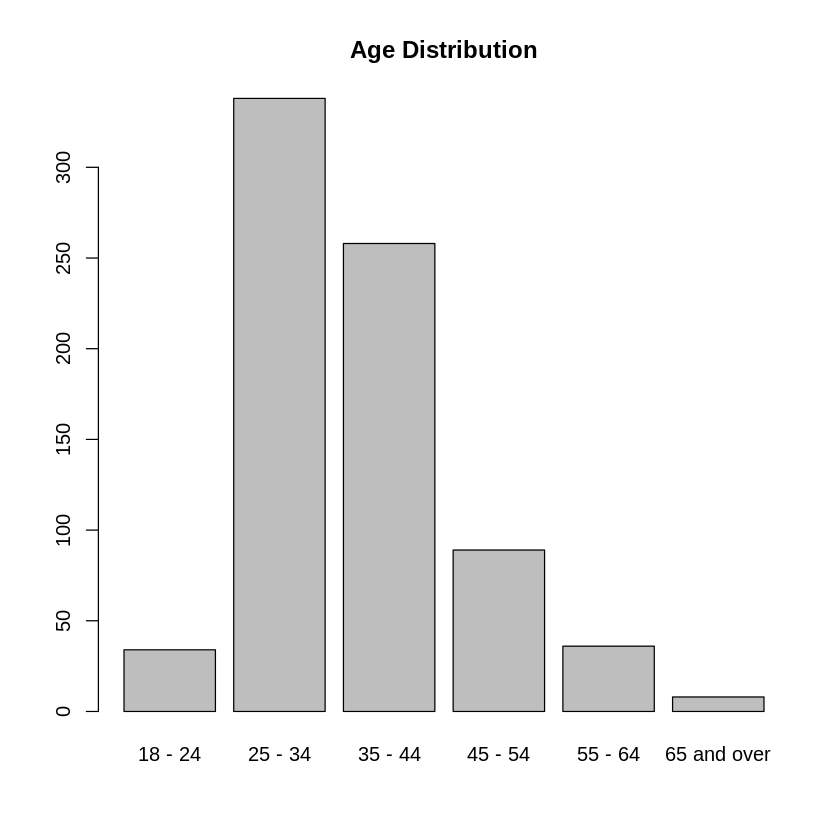

In [33]:
# Simple questions 

# Time to take entire survey?
total = mean(data$End - data$Start, na.rm = TRUE)
print(paste("Time to take entire survey: " ,total, " Seconds"))

# Question that took the longest to complete?
submit_times <- data[, grep("Submit", colnames(data), value = TRUE)]
submit_times = submit_times[, -c(1)]
submit_means = apply(submit_times, 2, mean, na.rm = TRUE)
longest = names(submit_means[which(submit_means == max(submit_means))])
print(paste("Question that took the longest to complete: " ,longest, ""))

# Question that took the least time?
shortest = names(submit_means[which(submit_means == min(submit_means))])
print(paste("Question that took the least to complete: " ,shortest, ""))

# Top-ranked criteria?
ranked = data[, grep("PG5", colnames(data), value = TRUE)]
ordered = ranked[, grep("Order", colnames(ranked), value = TRUE)]
means = apply(ordered, 2, mean, na.rm = TRUE)
top_ranked = names(means[which(means == max(means))])
print(paste("Top-ranked criteria: " ,top_ranked, ""))


# Demographic distribution by age?
print(paste("Demographic distribution by age: " ))
age_data <- select(data, PG12Resp) %>%
    filter(PG12Resp != '')
age_p <- factor(age_data[,])
barplot(table(age_p), main = 'Age Distribution')

### Interpret  basic summaries

In [3]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

### Hypothesis
The # of stars on Git will affect the priority, and the popularity for picking a package. 

Data prepared:
Response that are not relevant to my response will be removed. Takes only responses for PG5 that are associate with priority.

In [38]:
datas <- select(data, starts_with('PG5'), -ends_with('Order'), -ends_with('Time'), -ends_with('Submit'))
summary(datas)

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :877                  :923                  :768  
 Essential      : 60   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 26   High Priority  :200  
 Low Priority   : 85   Low Priority   :121   Low Priority   : 69  
 Medium Priority:134   Medium Priority: 92   Medium Priority:162  
 Not a Priority : 95   Not a Priority :188   Not a Priority : 51  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :852                  :753                  :852  
 Essential      : 22   Essential      : 79   Essential      : 63  
 High Priority  :111   High Priority  :252   High Priority  :137  
 Low Priority   : 88   Low Priority   : 63   Low Priority   : 84  
 Medium Priority:164   Medium Priority:162   Medium Priority:110  
 Not a Priority :116   Not a Priority : 44   Not a Priority :107  
           PG5_7NDYP              PG5_8CP               PG5_9F

### Correlation

In [39]:
# Shows number of Data point that is related to the #stars on the Git 
datas <- filter(datas, PG5_11NSG != '')
datas$PG5_11NSG <- factor(datas$PG5_11NSG)
summary(datas$PG5_11NSG)

Essential   High Priority    Low Priority Medium Priority  Not a Priority 
              6              29              89              68             271

#remove variables that does not have correlation 

In [53]:
for(i in colnames(data))
{
    data[,i] <- as.numeric (data[,i]);
}
data <- replace(data, is.na(data), 0)


### linear regression model

In [51]:
for(i in colnames(datas))
{
    datas[,i] <- as.numeric (datas[,i]);
}
datas <- replace(datas, is.na(datas), 0)
MODEL <- lm(PG5_11NSG ~ ., data = datas)
summary(MODEL)


Call:
lm(formula = PG5_11NSG ~ ., data = datas)

Residuals:
   Min     1Q Median     3Q    Max 
-3.051 -0.670  0.312  0.543  2.177 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2403     0.2045   10.95  < 2e-16 ***
PG5_1RRPQ     0.0094     0.0359    0.26   0.7935    
PG5_2BNUI     0.0740     0.0396    1.87   0.0619 .  
PG5_3HDS     -0.0451     0.0333   -1.35   0.1761    
PG5_4VGP      0.0129     0.0358    0.36   0.7190    
PG5_5PHR      0.0027     0.0368    0.07   0.9417    
PG5_6SSYOP    0.0205     0.0326    0.63   0.5299    
PG5_7NDYP    -0.0411     0.0347   -1.18   0.2377    
PG5_8CP       0.0613     0.0344    1.78   0.0754 .  
PG5_9FRP      0.0555     0.0349    1.59   0.1128    
PG5_10RPA     0.0109     0.0341    0.32   0.7491    
PG5_12NWG     0.1943     0.0475    4.09  5.1e-05 ***
PG5_13NFG     0.1389     0.0475    2.93   0.0036 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.93 on 450 degre

### Conclusion
There are 5 variables show less than 0.05 p-value out of 13 variables. Therefore, 61% (8 divided by 13) of the data are not significant to rejeccts the hypothesis that the #stars on Git is corelated to the priority. However, the adjusted r^2 value of .213 corelates only 21.3% of data, which is not significant enough to support the positive corelation and to support or hypothesis. 

### potential improvment / topic for future research 
We should eliminate the results with too long/short survey time. The ones are longer than 25min or less than 3min should be eliminated. Also, we should only take those "completed" survey into account. The "NaN"/blank values gives technical issue in data cleaning and affects the result coeifficient.  